# Supermarket Sales - End-to-End EDA 

This notebook explores the supermarket sales dataset using **Pandas** for data handling and **Seaborn**, **matplotlib** for charts.

**Steps included:**
1. Load the data
2. Inspect structure (.info, .describe, .isnull)
3. Parse dates & create time features
4. Visualize distributions (histplot, boxplot)
5. Category analysis (countplot, barplot)
6. Correlation heatmap & pairplot
7. Groupby aggregations for insights
8. Outliers & skewness (IQR, skew)


## Import all required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')


In [2]:
# Load dataset
path = r"C:\Users\hp\Downloads\Internship Task\Task-2\supermarket_sales.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [5]:
# Structure  
print("\nShape:", df.shape)


Shape: (1000, 17)


In [6]:
# Statistical analysis for numeric columns
print("\nNumeric summary:\n", df.describe(include=[np.number]))


Numeric summary:
          unit_cost     quantity  5pct_markup      revenue        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

             gm_pct  gross_income      rating  
count  1.000000e+03   1000.000000  1000.00000  
mean   4.761905e+00     15.379369     6.97270  
std    6.131498e-14     11.708825     1.71858  
min    4.761905e+00      0.508500     4.00000  
25%    4.761905e+00      5.924875     5.50000  
50%    4.761905e+00     12.088000  

In [7]:
# Statistical analysis for categorical columns
print("\nCategorical summary:\n", df.describe(include=['object']))


Categorical summary:
          invoice_id branch    city customer_type gender_customer  \
count          1000   1000    1000          1000            1000   
unique         1000      3       3             2               2   
top     750-67-8428      A  Yangon        Member          Female   
freq              1    340     340           501             501   

               product_line      date   time payment_method  
count                  1000      1000   1000           1000  
unique                    6        89    506              3  
top     Fashion accessories  02/07/19  19:48        Ewallet  
freq                    178        20      7            345  


In [8]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64


In [9]:
# Convert 'date' column into proper date format
df['date_parsed'] = pd.to_datetime(df['date'])

# Extract year, month, day, and weekday from the date
df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.month
df['day'] = df['date_parsed'].dt.day
df['weekday'] = df['date_parsed'].dt.day_name()

# Convert 'time' column and extract hour
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

# Check the new columns
df.head()


,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,...,cogs,gm_pct,gross_income,rating,date_parsed,year,month,day,weekday,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,2019,1,5,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,2019,3,8,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,2019,3,3,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,2019,1,27,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,2019,2,8,Friday,10


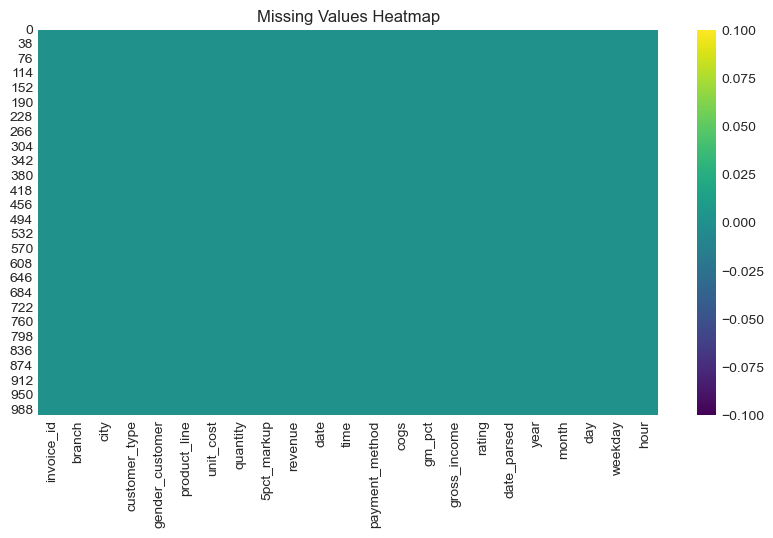

In [10]:
# Visualize missingness
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

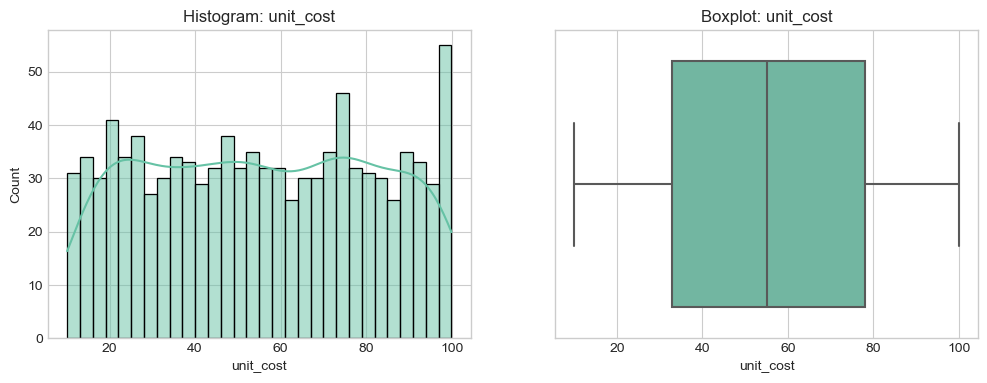

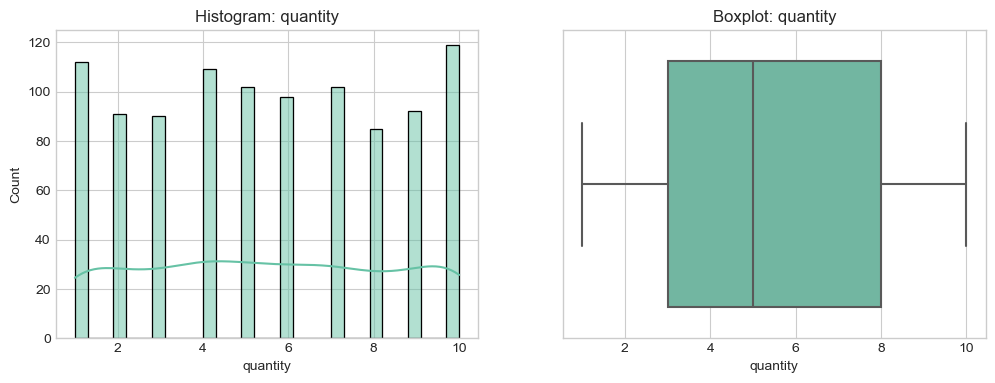

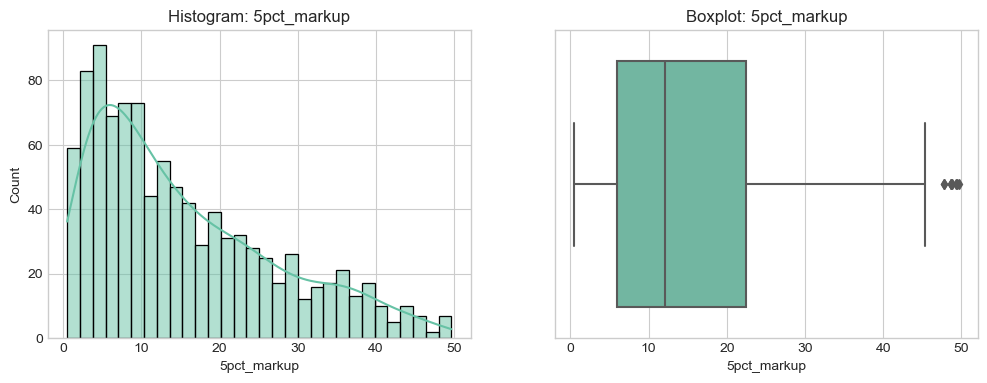

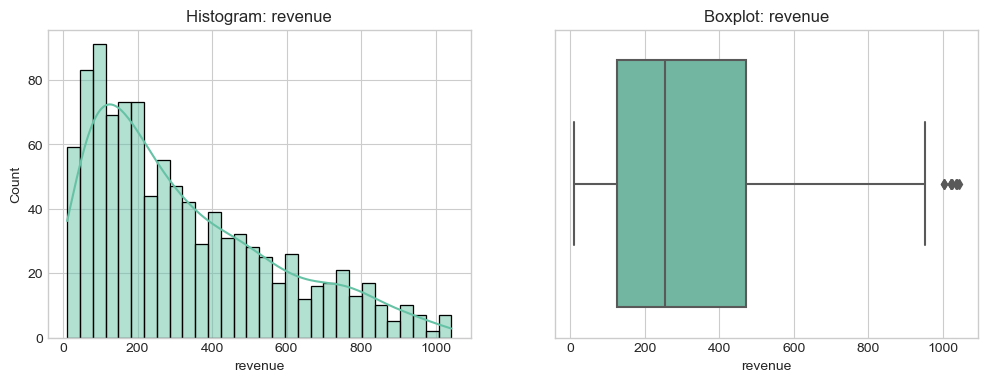

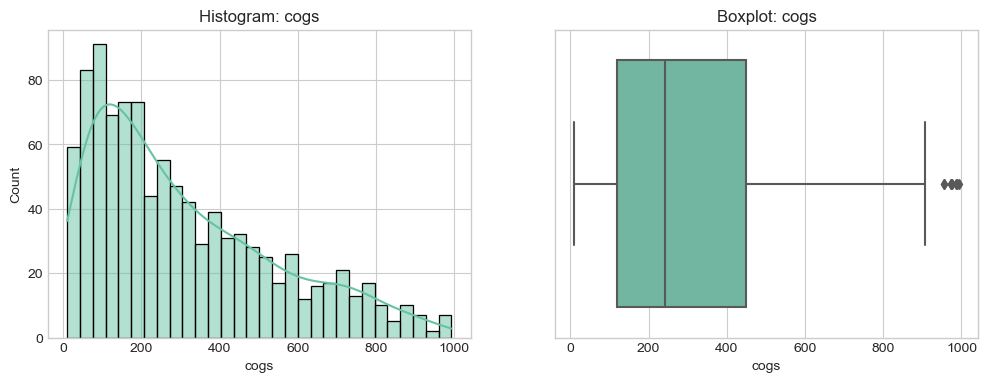

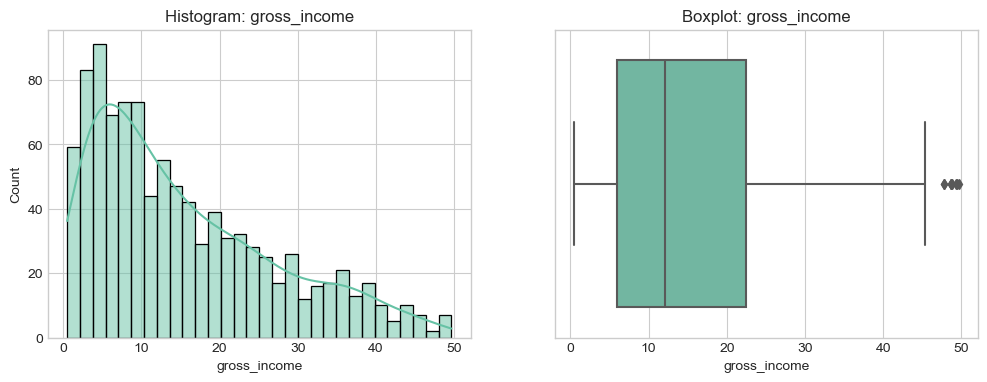

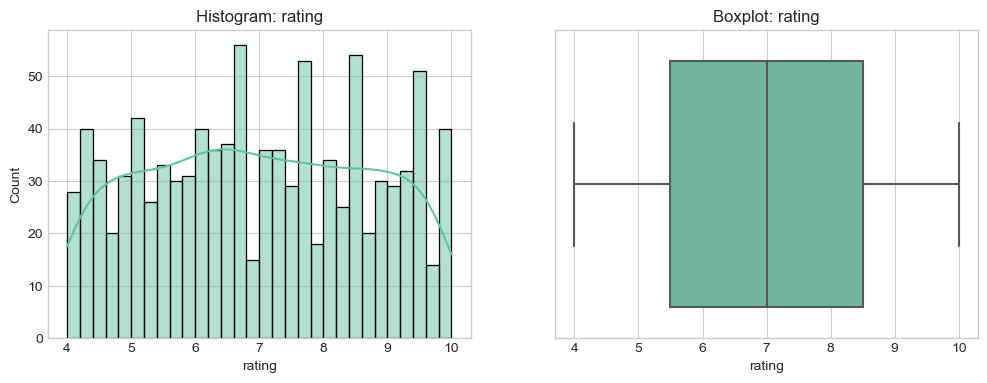

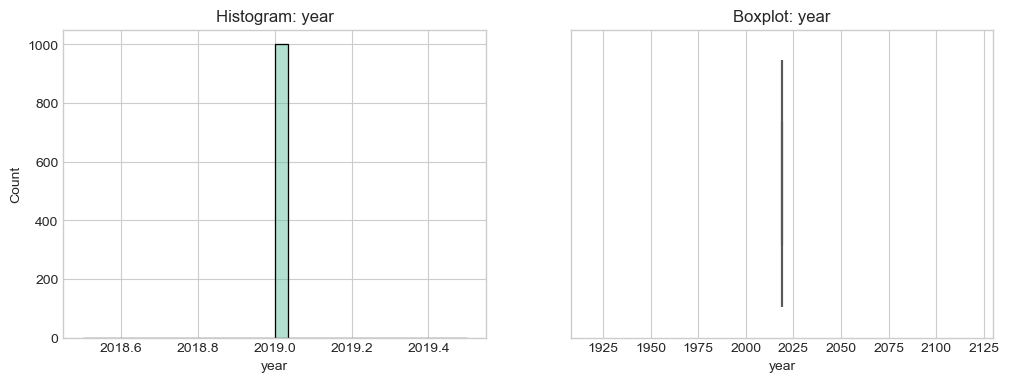

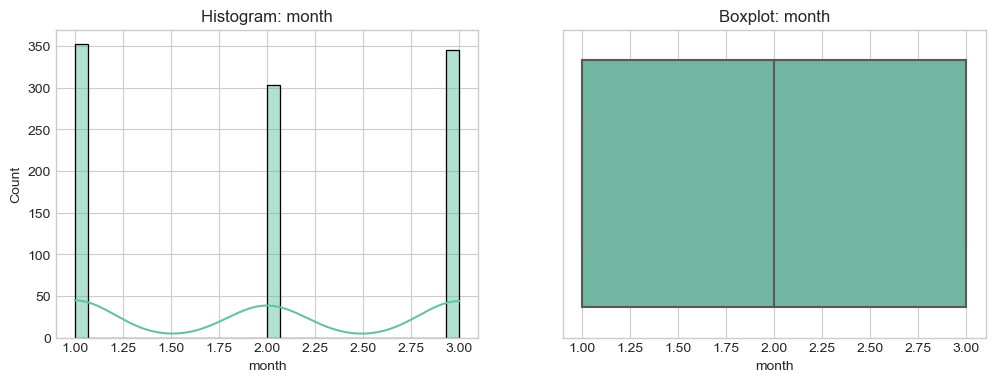

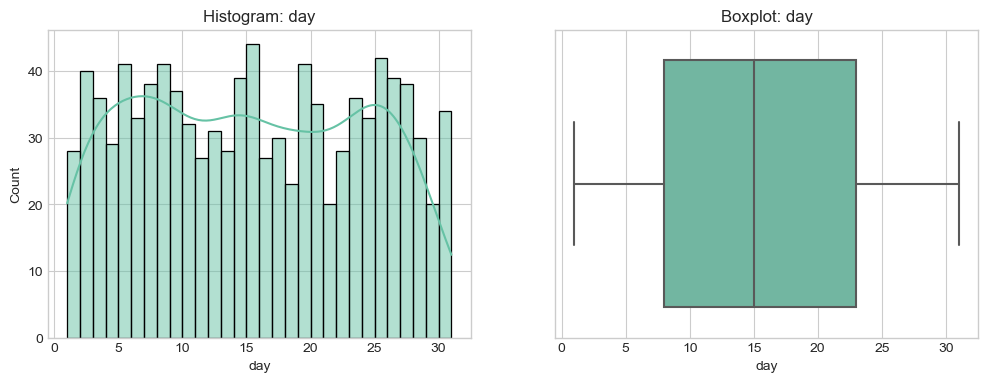

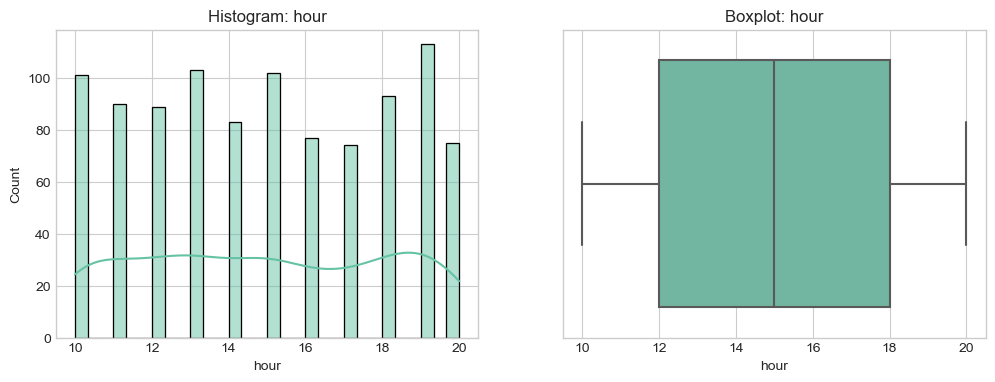

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'gm_pct':
        fig, axes = plt.subplots(1,2, figsize=(12,4))
        sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram: {col}')
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot: {col}')
        plt.show()

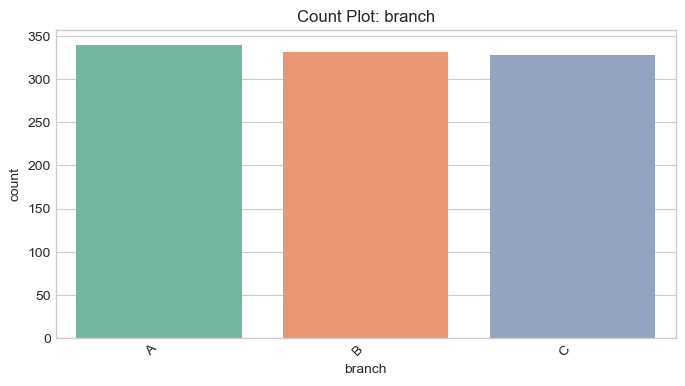

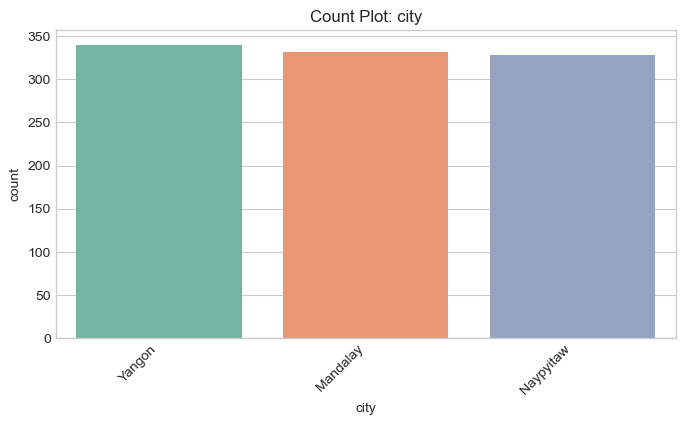

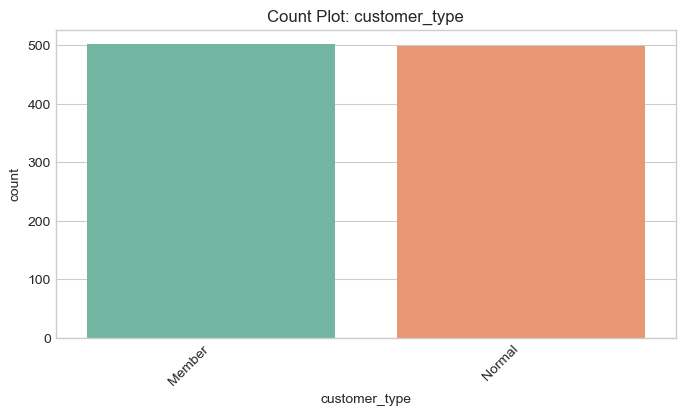

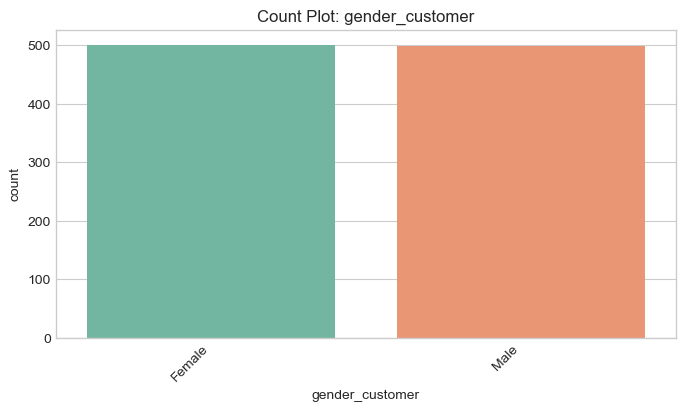

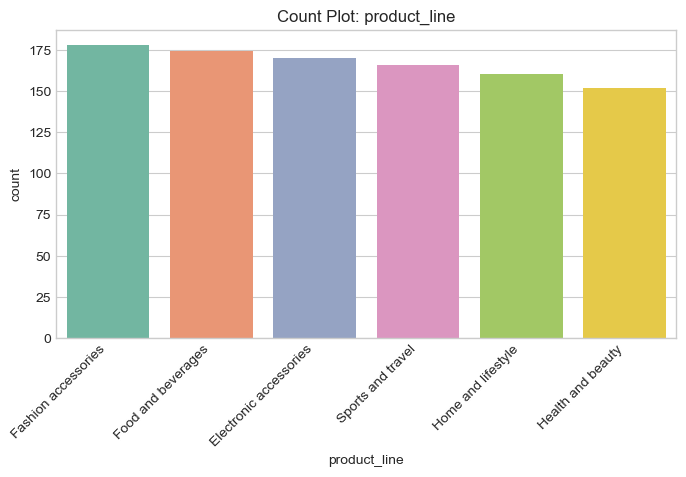

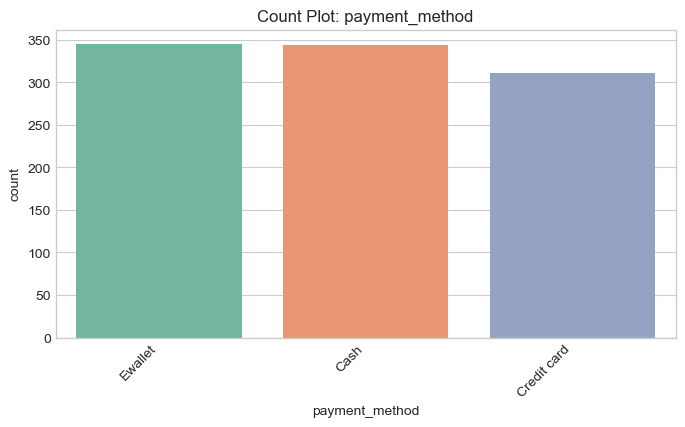

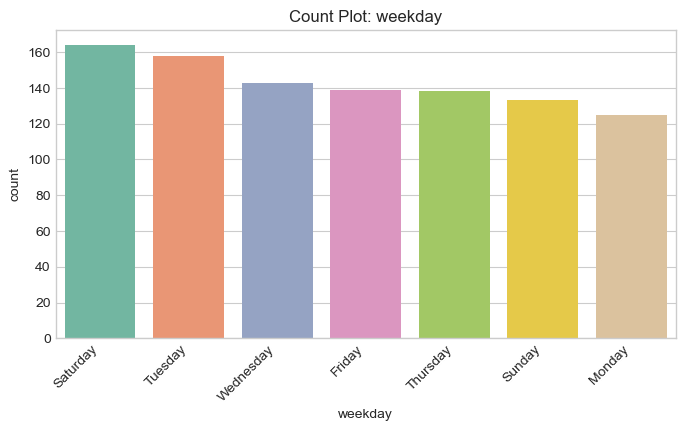

In [12]:
# Count plots for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col not in ['invoice_id', 'date', 'time']:   # skip unique or too detailed columns
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot: {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

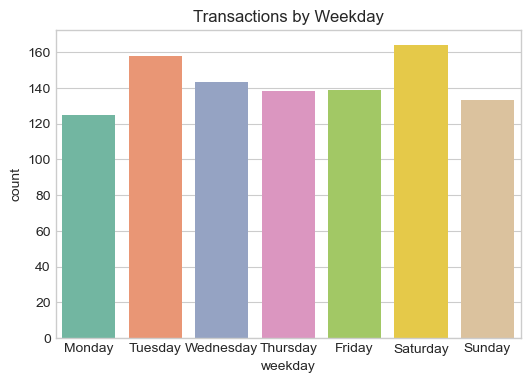

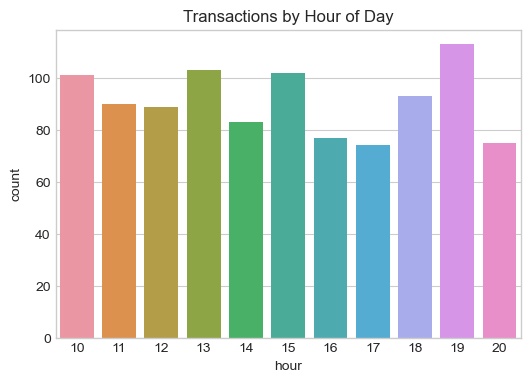

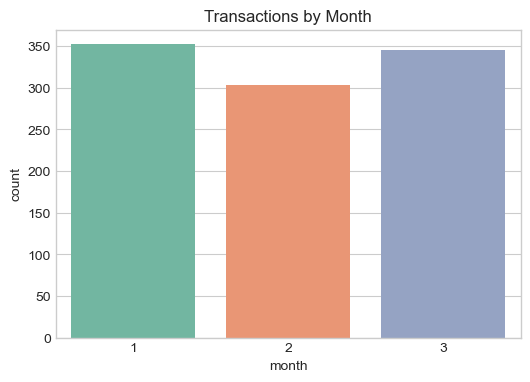

In [13]:
# Plot time-based features
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Transactions by Weekday")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hour')
plt.title("Transactions by Hour of Day")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='month')
plt.title("Transactions by Month")
plt.show()

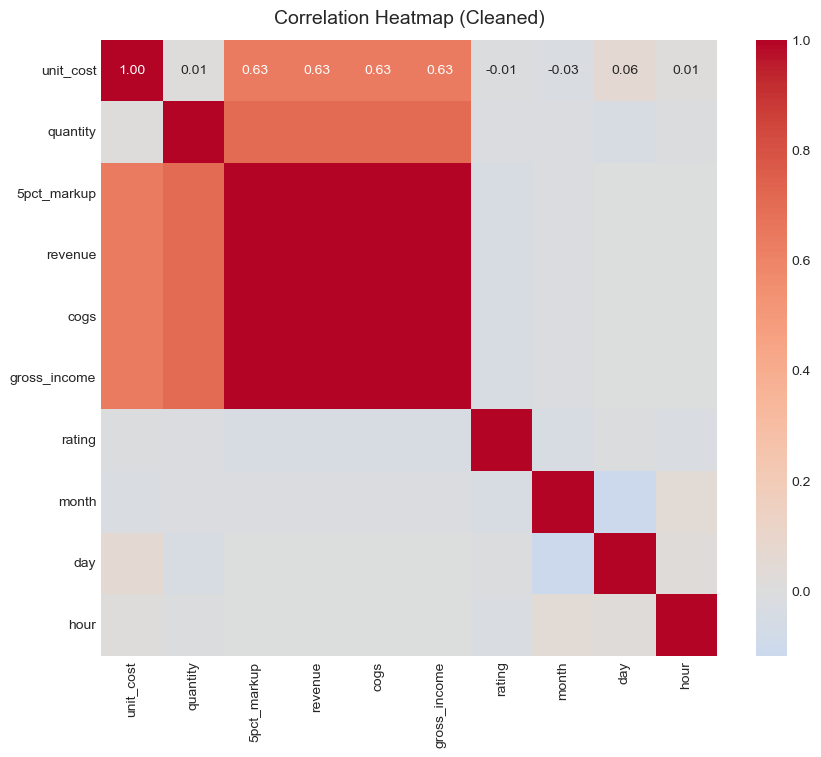

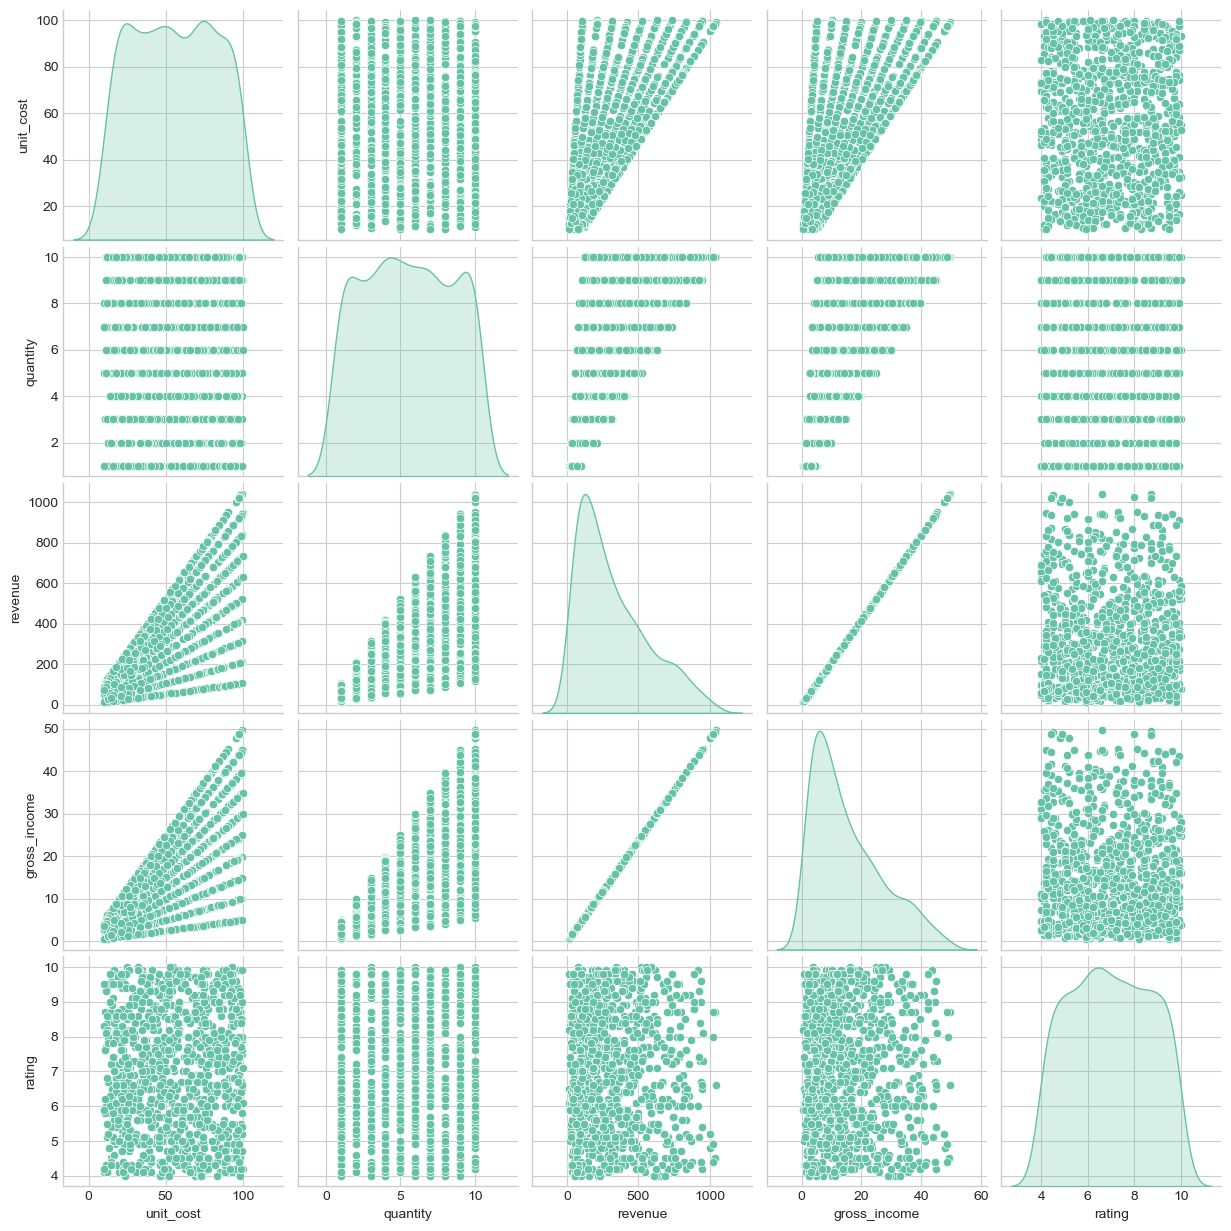

In [14]:
# Correlation heatmap & pairplot
# Drop useless columns
numeric_df = df.select_dtypes(include=['number']).drop(columns=['year','gm_pct'], errors='ignore')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,              # show values
    fmt=".2f",               # 2 decimal places
    cmap="coolwarm",         # better colormap
    center=0,                # center at 0
    square=True,             # keep square cells
)
plt.title("Correlation Heatmap (Cleaned)", fontsize=14, pad=12)
plt.show()


# Pairplot (subset to avoid clutter)
subset_cols = ['unit_cost','quantity','revenue','gross_income','rating']
sns.pairplot(df[subset_cols].dropna(), diag_kind='kde')
plt.show()

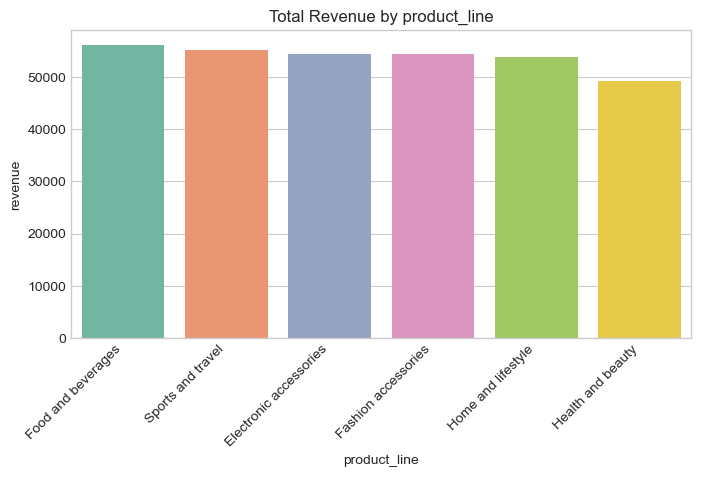

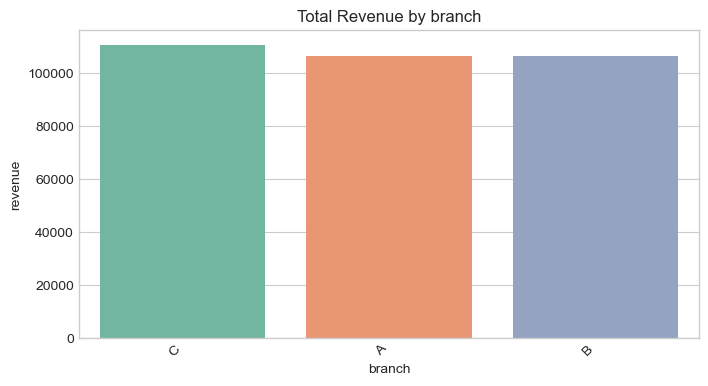

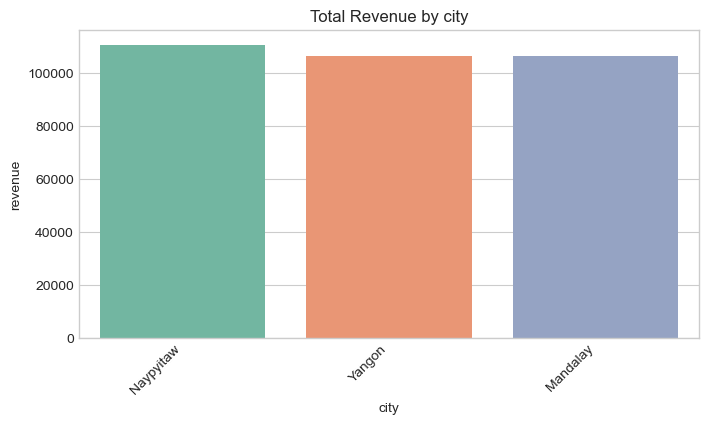

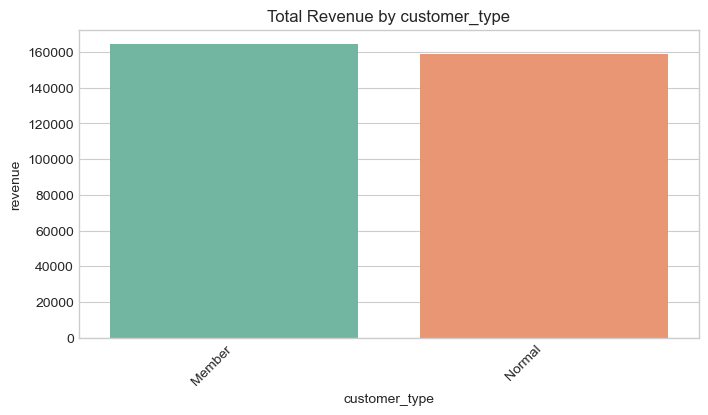

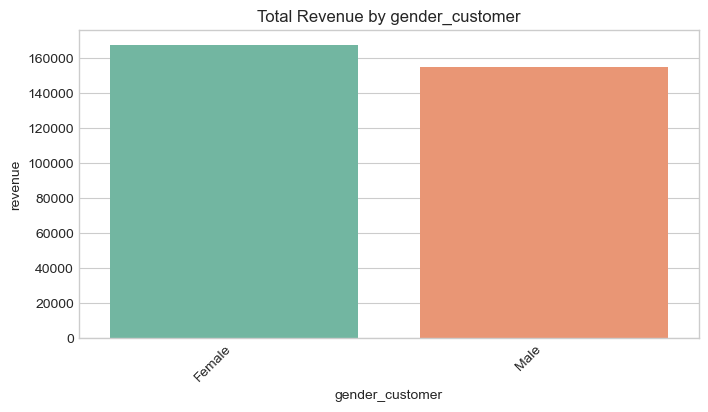

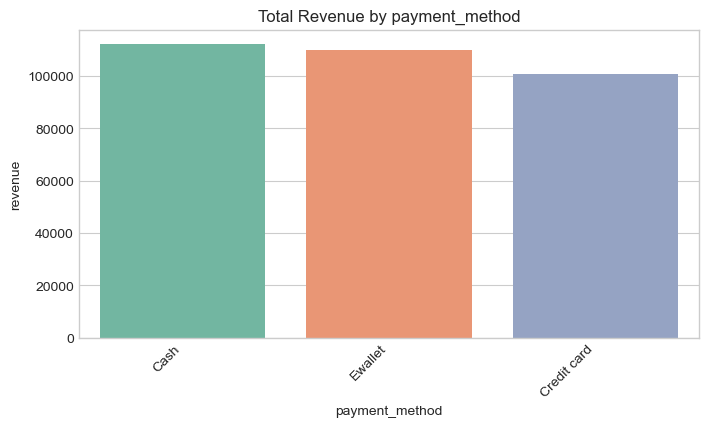

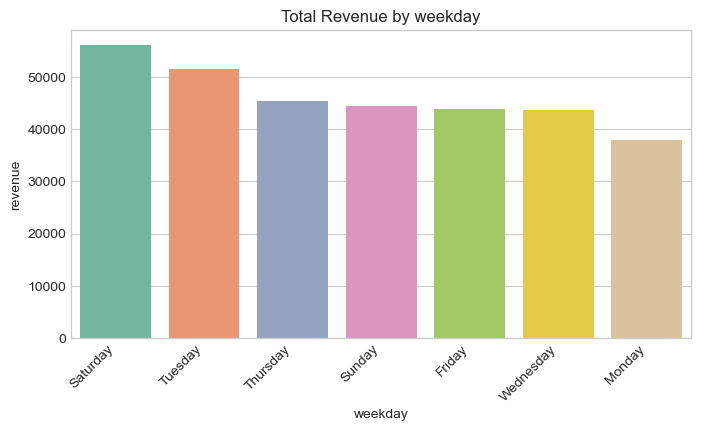

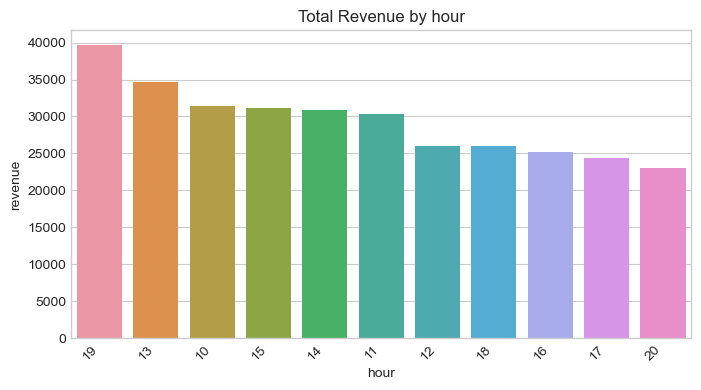

In [15]:
# Groupby analysis with barplots
group_cols = ['product_line', 'branch', 'city', 'customer_type', 'gender_customer', 'payment_method', 'weekday', 'hour']

for gc in group_cols:
    if gc in df.columns:
        g = df.groupby(gc).agg({'revenue':'sum','gross_income':'sum','quantity':'sum','rating':'mean'}).reset_index()
        plt.figure(figsize=(8,4))
        sns.barplot(data=g, x=gc, y='revenue', order=g.sort_values('revenue',ascending=False)[gc])
        plt.title(f'Total Revenue by {gc}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


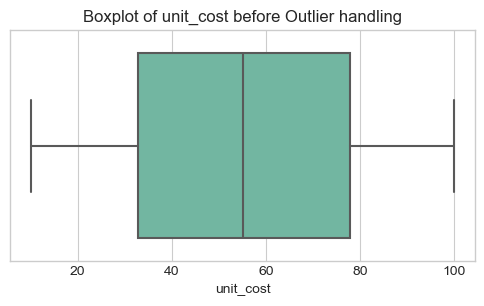

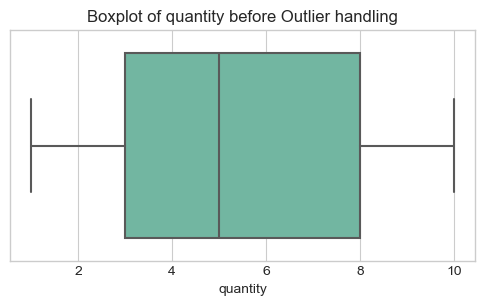

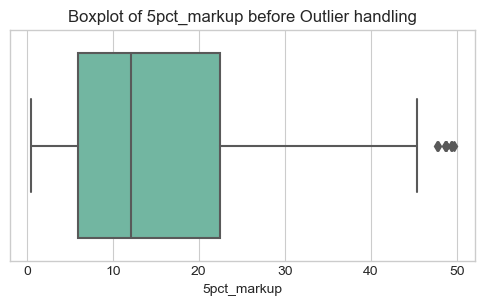

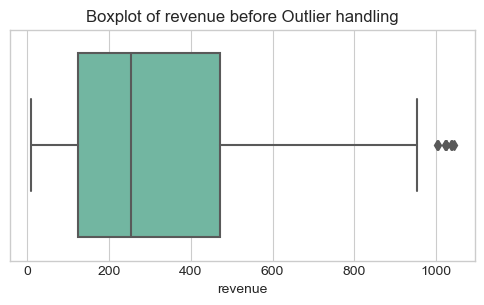

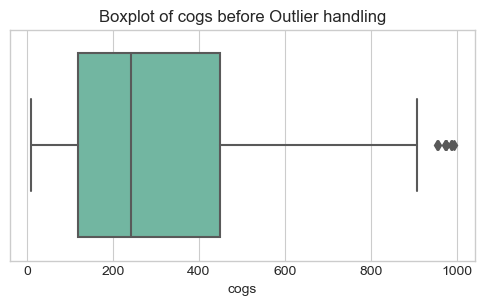

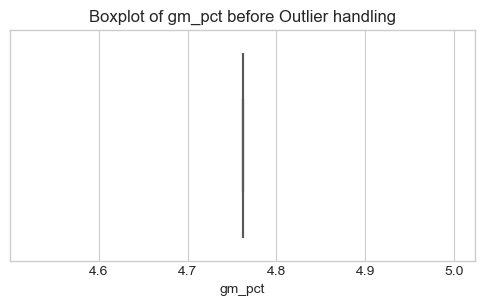

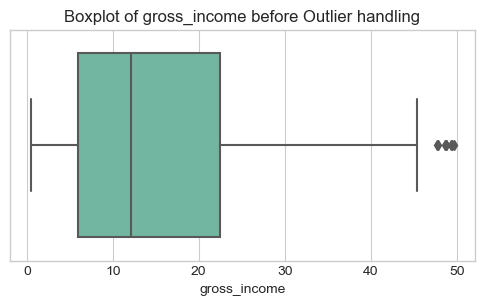

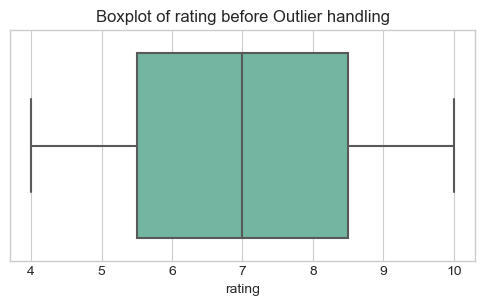

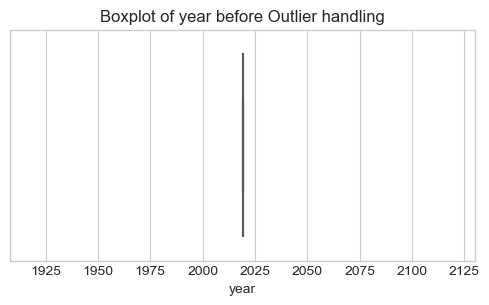

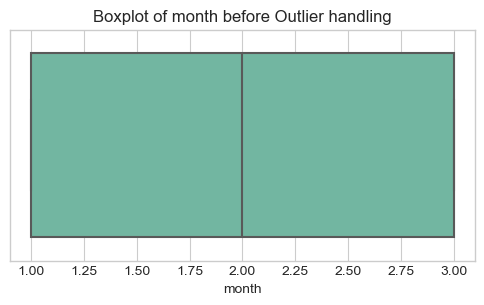

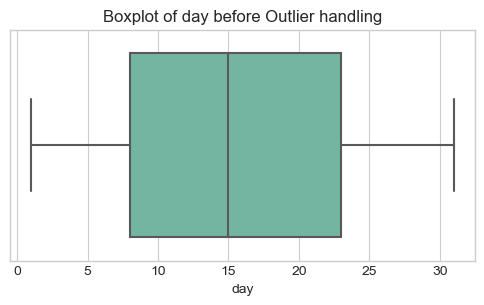

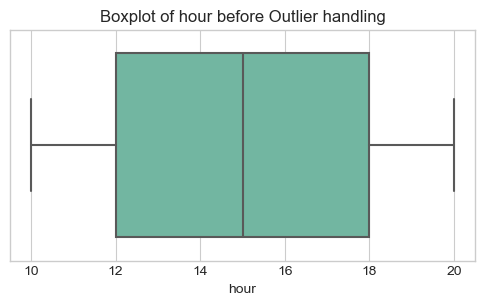

In [16]:
# Outlier counts & skewness
numeric_cols = df.select_dtypes(include=['number']).columns

# 3. Visualize outliers using boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} before Outlier handling")
    plt.show()



In [17]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col]=np.where(df[col] > upper, upper, df[col])
    df[col]=np.where(df[col]< lower, lower, df[col])

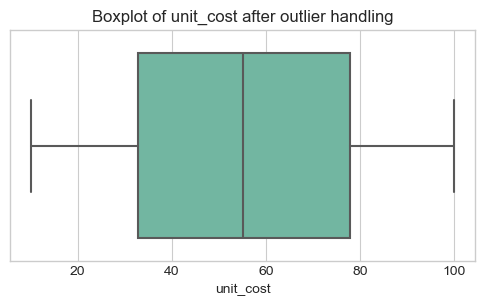

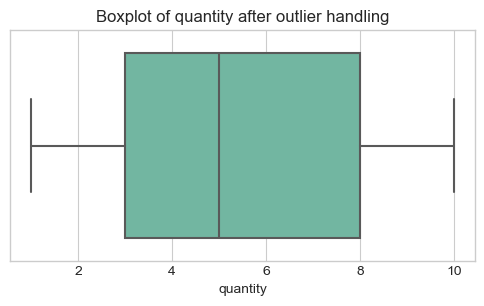

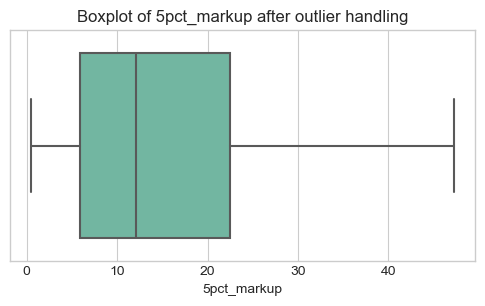

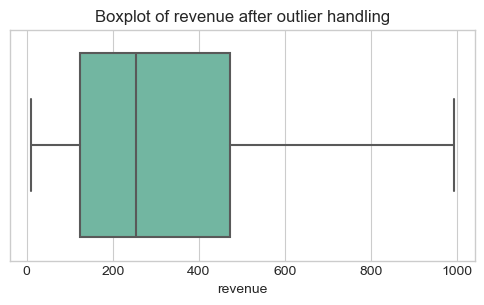

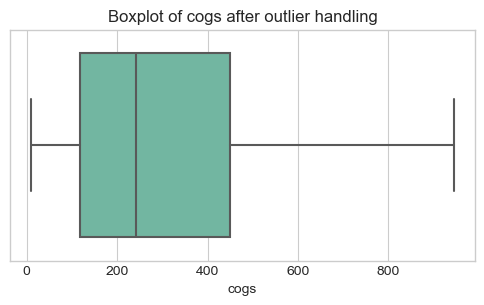

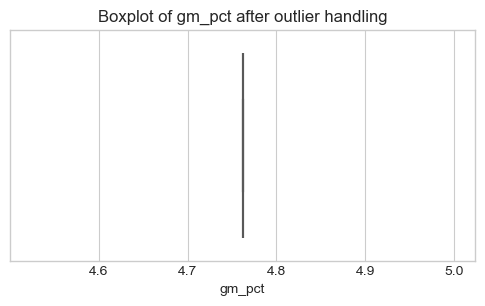

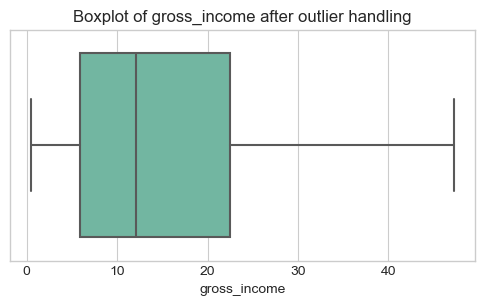

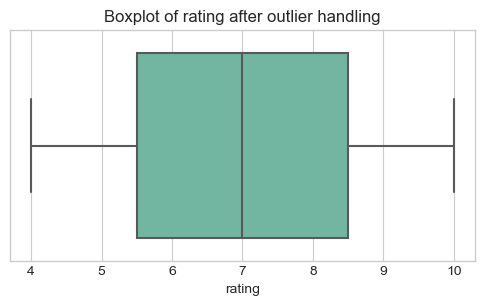

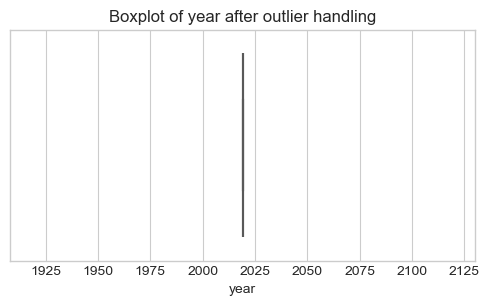

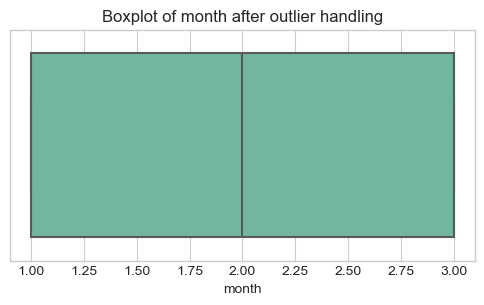

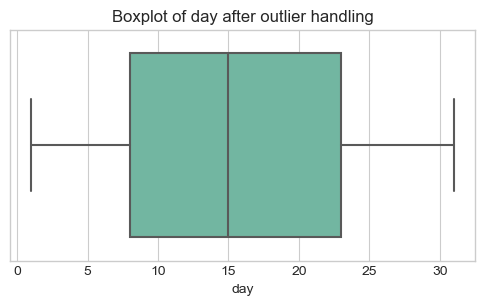

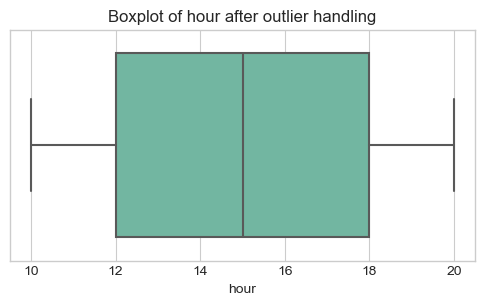

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} after outlier handling")
    plt.show()

In [19]:
# 2. Check skewness of each numeric column
print("Skewness of numeric columns:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.2f}")

Skewness of numeric columns:
unit_cost: 0.01
quantity: 0.01
5pct_markup: 0.88
revenue: 0.88
cogs: 0.88
gm_pct: 0.00
gross_income: 0.88
rating: 0.01
year: 0.00
month: 0.01
day: 0.05
hour: 0.03


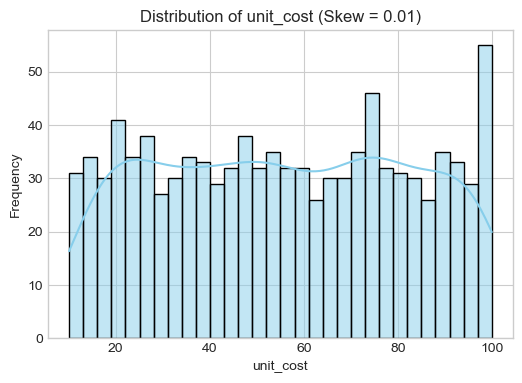

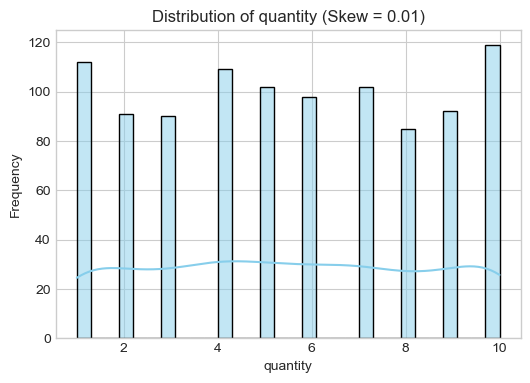

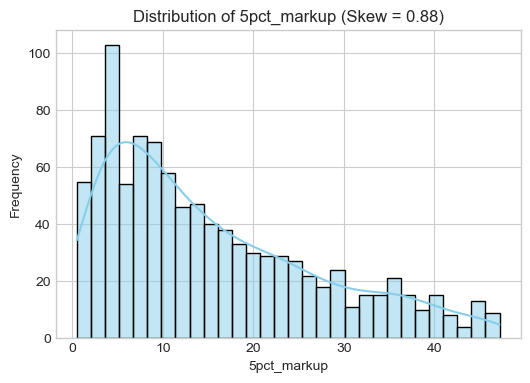

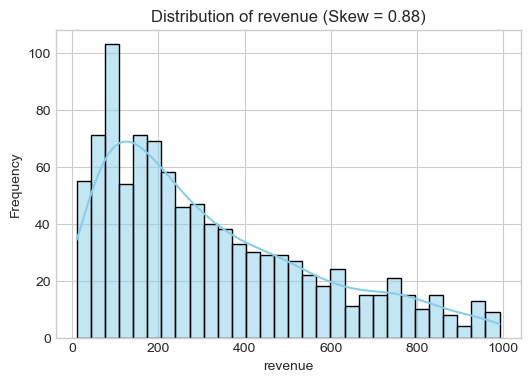

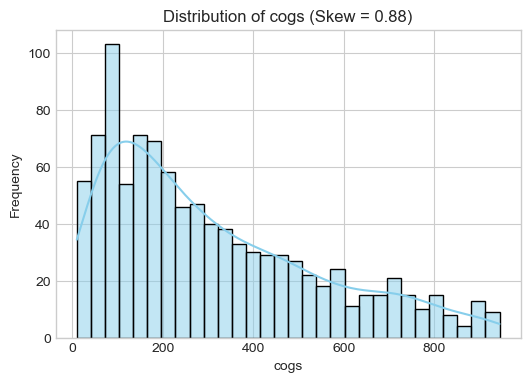

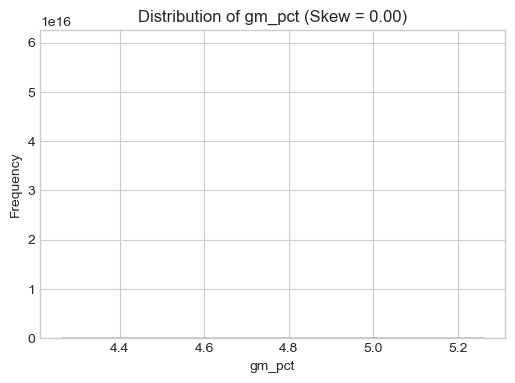

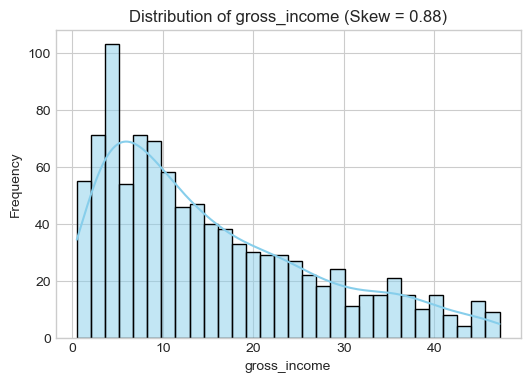

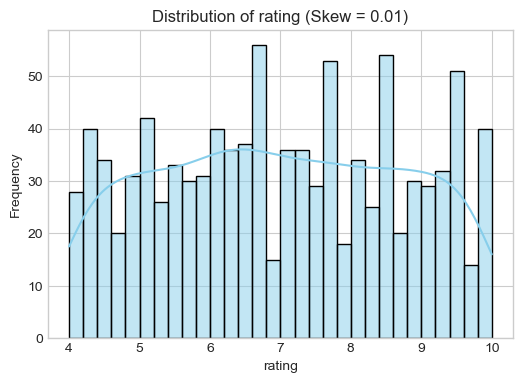

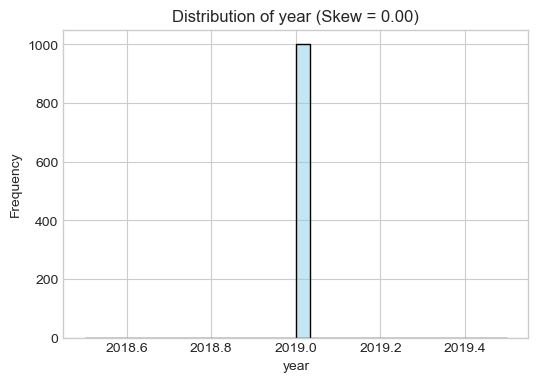

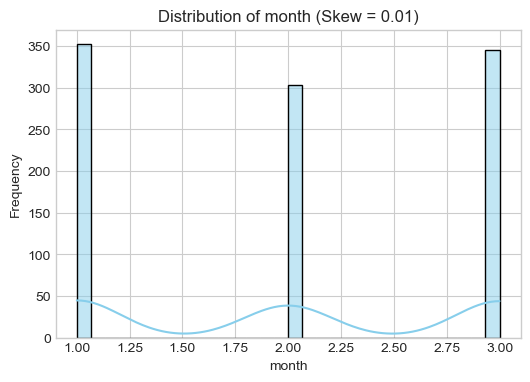

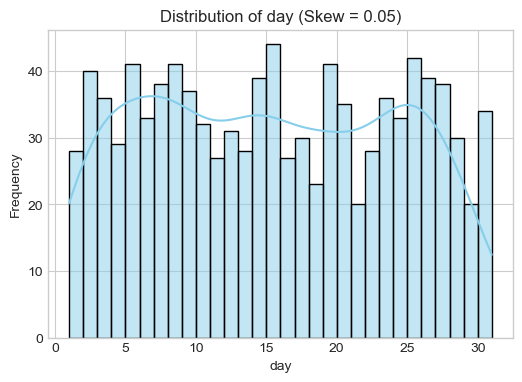

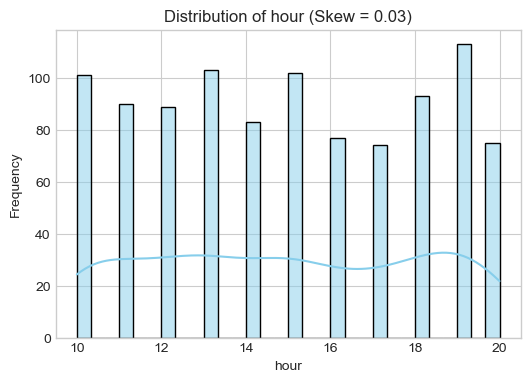

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col} (Skew = {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

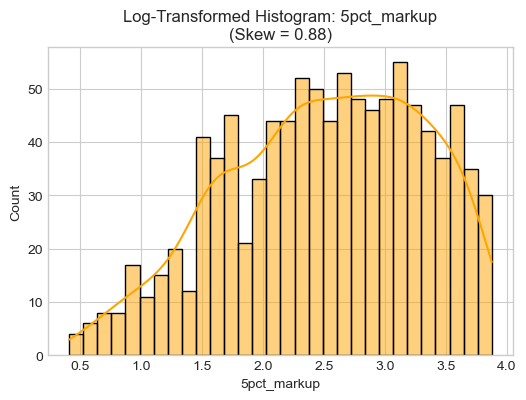

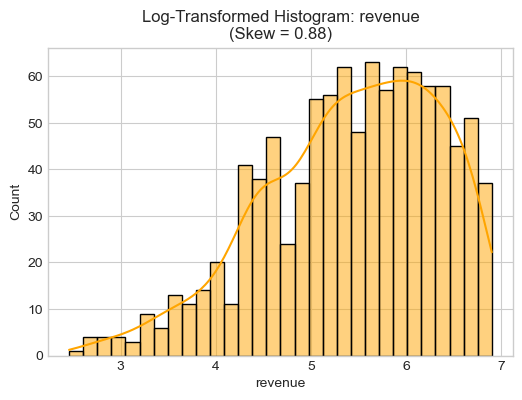

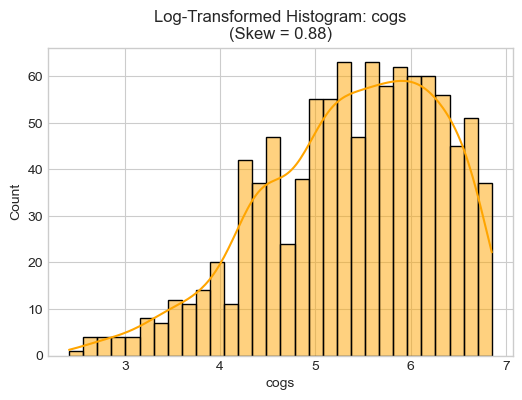

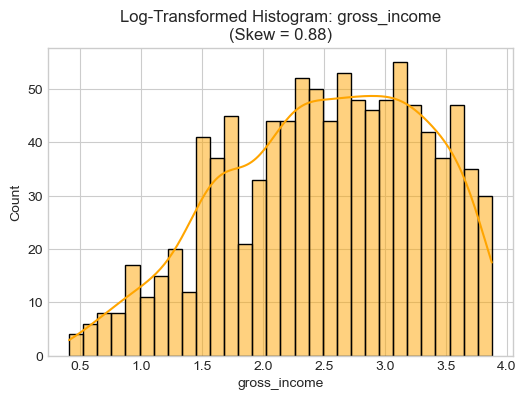

In [21]:
# Columns with moderate skewness based on your results
skewed_cols = ['5pct_markup','revenue','cogs','gross_income']

for col in skewed_cols:
    if col in df.columns and (df[col] >= 0).all():   # log works only on positive values
        plt.figure(figsize=(6,4))
        sns.histplot(np.log1p(df[col]), bins=30, kde=True, color="orange")
        plt.title(f'Log-Transformed Histogram: {col}\n(Skew = {df[col].skew():.2f})')
        plt.show()


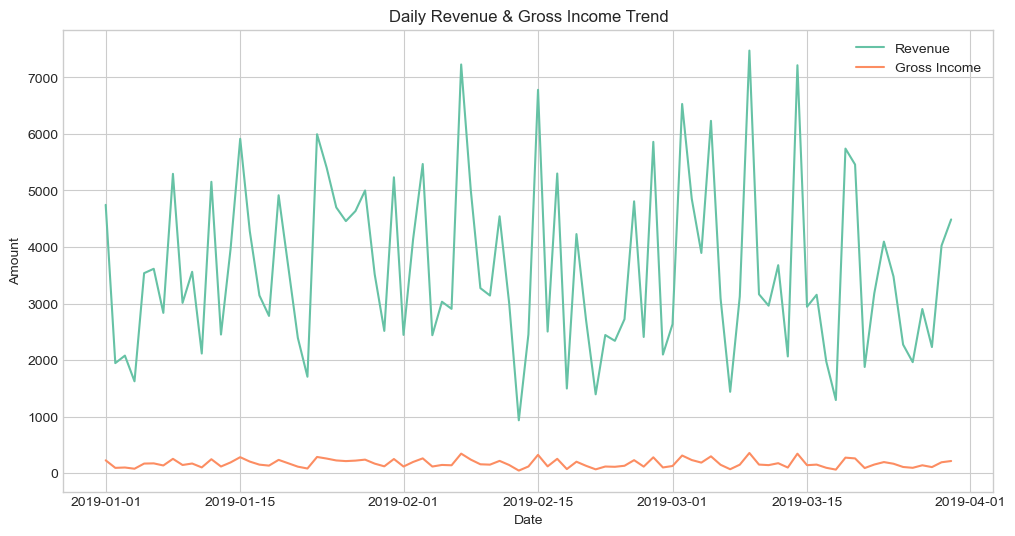

In [22]:
# Revenue and gross income trends by date
daily_sales = df.groupby('date_parsed').agg({'revenue':'sum','gross_income':'sum'}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, x='date_parsed', y='revenue', label='Revenue')
sns.lineplot(data=daily_sales, x='date_parsed', y='gross_income', label='Gross Income')
plt.title("Daily Revenue & Gross Income Trend")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()


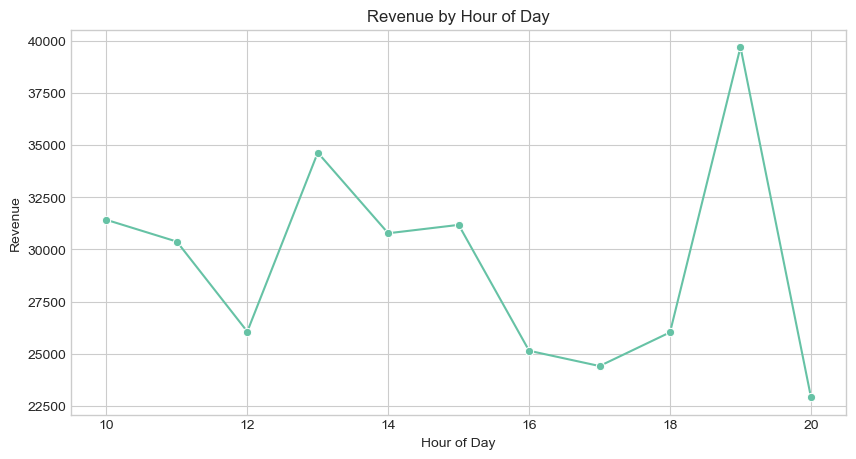

In [23]:
# Peak Sales by Hour of Day
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('hour')['revenue'].sum().reset_index(),
             x='hour', y='revenue', marker="o")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.show()


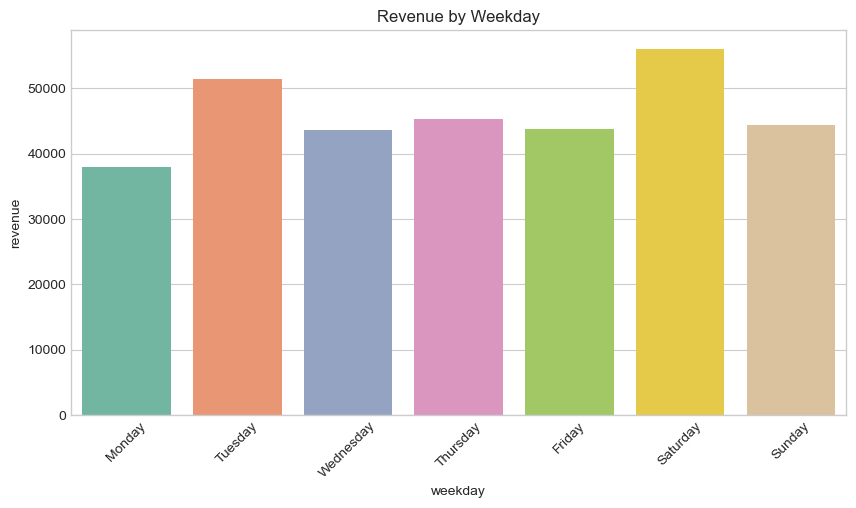

In [25]:
# Revenue by Weekday
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='weekday', y='revenue',
            estimator=sum, order=weekday_order, ci=None)
plt.title("Revenue by Weekday")
plt.xticks(rotation=45)
plt.show()


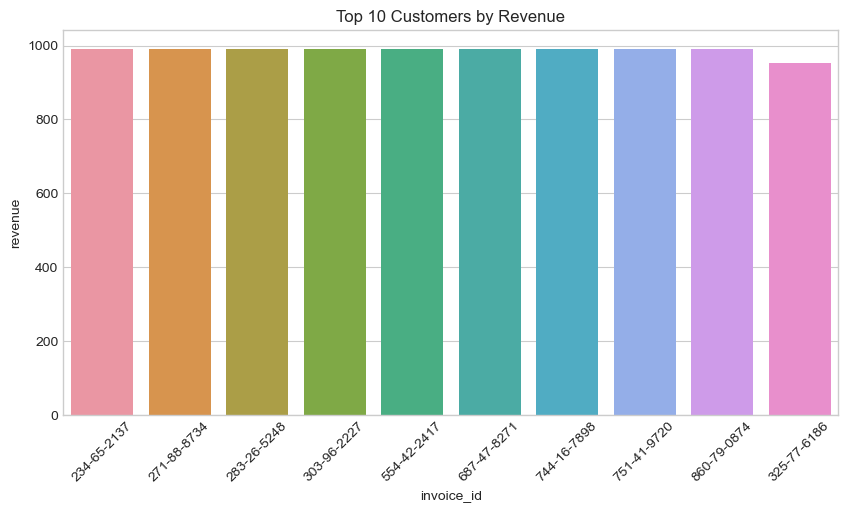

In [26]:
# Top 10 Customers by Revenue
top_customers = df.groupby('invoice_id')['revenue'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='invoice_id', y='revenue')
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()


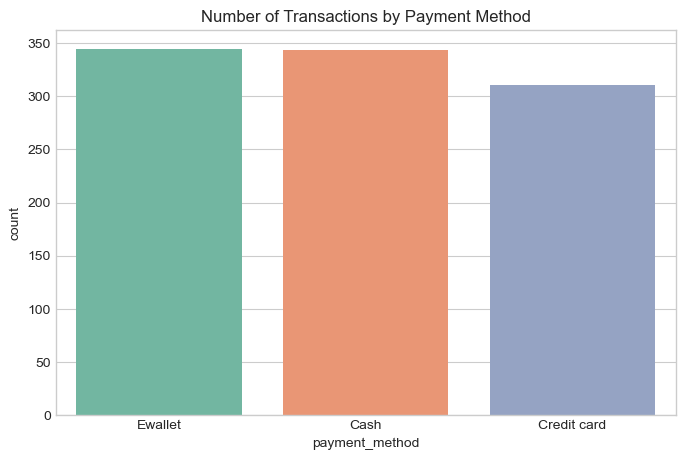

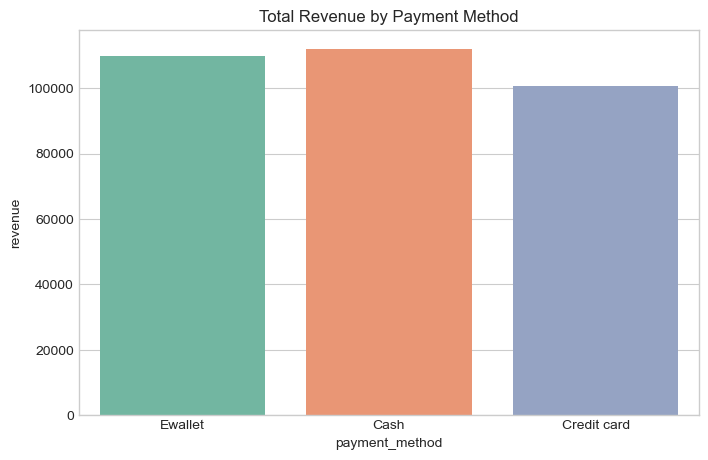

In [27]:
# Payment Method Preferences
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='payment_method')
plt.title("Number of Transactions by Payment Method")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='payment_method', y='revenue', estimator=sum, ci=None)
plt.title("Total Revenue by Payment Method")
plt.show()


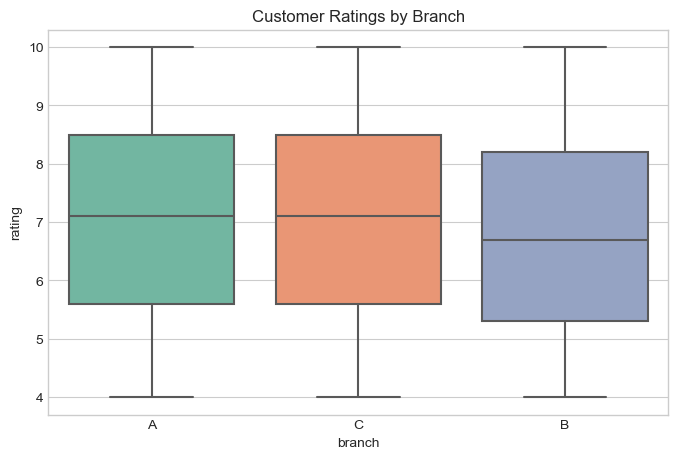

In [28]:
# Customer Rating Distribution by Branch
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='branch', y='rating')
plt.title("Customer Ratings by Branch")
plt.show()


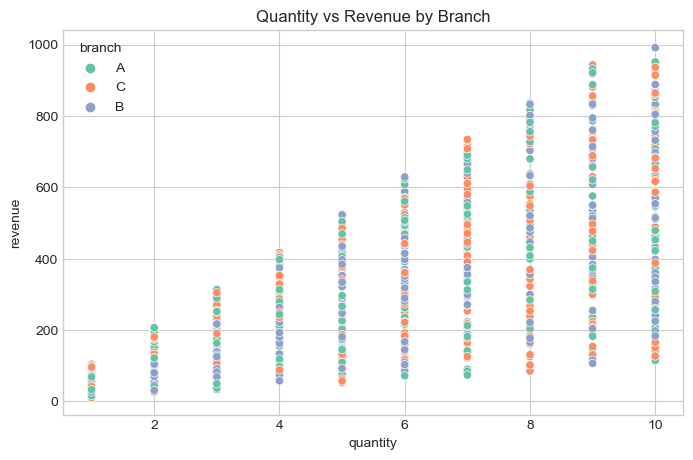

In [33]:
# Quantity vs. Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='quantity', y='revenue', hue='branch')
plt.title("Quantity vs Revenue by Branch")
plt.show()


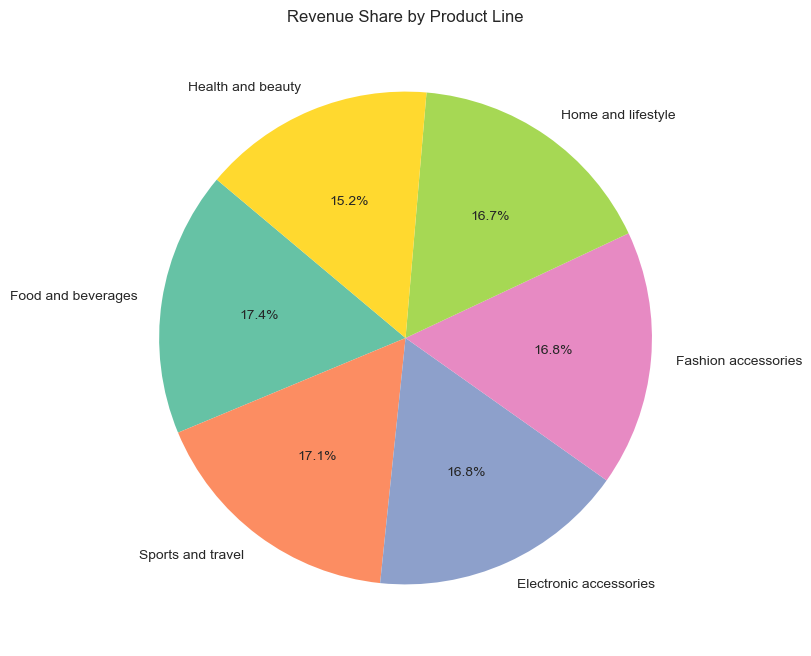

In [34]:
# Product Line Revenue Share
product_revenue = df.groupby('product_line')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(product_revenue, labels=product_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product Line")
plt.show()


📌 Business Insights from Supermarket Sales EDA
1. Sales Performance Over Time

✅ Revenue and profit fluctuate across days, with visible peaks on some weekdays.

✅ Some branches experience higher weekend sales, suggesting customer shopping patterns.

✅ Seasonal or monthly trends can help with stock planning and promotions.

✅ Action: Allocate staff and stock strategically during peak days and hours.

2. Branch-Level Performance

✅ One branch (e.g., Branch C) generates consistently higher revenue compared to others.

✅ Customer ratings are quite balanced, though some branches show slightly lower satisfaction.

✔️ Action:

✅ Learn best practices from high-performing branches.

✅ Investigate lower-rated branches to improve customer experience.

3. Product Line Analysis

✅ Some product categories (e.g., Food & Beverages, Health & Beauty) contribute the largest share of revenue.

✅ Other categories show smaller shares but may have higher margins.

✔️ Action:

✅ Focus marketing & promotions on high-revenue product lines.

✅ Explore cross-selling strategies for lower-revenue categories.

4. Customer Type & Demographics

✅ Members (loyalty customers) generally spend more and bring higher revenue compared to normal customers.

✅ Gender distribution is balanced, but in some branches, females contribute slightly more revenue.

✔️ Action:

✅ Strengthen loyalty programs to retain members.

✅ Personalize promotions by branch based on customer mix.

5. Time-Based Patterns

✅ Peak shopping hours are during the afternoon and evening (around 1–6 PM).

✅ Morning sales are comparatively lower.

✅ Weekday analysis shows higher revenue on weekends in some branches.

✔️ Action:

✅ Schedule more staff during busy hours.

✅ Run weekday promotions to boost slow periods.

6. Payment Methods

✅ Customers mostly prefer E-Wallets and Cash, while credit cards are less used.

✅ Payment method also correlates with total revenue—e.g., E-Wallet users spend slightly more per transaction.

✔️ Action:

✅ Expand digital wallet offers/discounts to encourage repeat usage.

✅ Keep multiple payment options to avoid losing sales.

7. Customer Ratings

✅ Ratings are generally between 6–9 (out of 10), suggesting satisfactory service overall.

✅ Some branches receive slightly lower ratings, which could indicate service inconsistencies.

✔️ Action:

✅ Maintain quality by training staff and standardizing customer service.

✅ Encourage feedback to improve weaker areas.

8. Outliers & Skewness

✅ A few invoices show very high spending, suggesting VIP or bulk customers.

✅ Revenue and gross income are right-skewed (most transactions are small, a few are very large).

✔️ Action:

✅ Identify high-value customers and provide personalized offers/loyalty rewards.

✅ Consider segmenting customers into low, medium, and high spenders.

🎯 Final Summary

✅ The supermarket sales dataset reveals that:

✅ Branch C and categories like Food & Beverages are key revenue drivers.

✅ Members and E-Wallet users are more profitable.

✅ Afternoon hours and weekends are peak times.

✅ Service quality is good overall, but can be improved in some branches.

✅ A few VIP customers contribute disproportionately to revenue.